In [1]:
import os

In [4]:
for i in ['data', 'model', 'img', 'result']:
    if not os.path.exists(i):
        os.makedirs(i)

# Download data

In [ ]:
if not os.path.exists(os.path.join('data', 'train.csv')):
    !kaggle competitions download -c playground-series-s5e3
    !unzip playground-series-s5e3.zip -d data
    !rm playground-series-s5e3.zip
    !kaggle datasets download subho117/rainfall-prediction-using-machine-learning
    !unzip rainfall-prediction-using-machine-learning.zip -d data
    !rm rainfall-prediction-using-machine-learning.zip

In [37]:
import polars as pl
import pandas as pd
import numpy as np
import sgpp, dproc, sgutil
import seaborn as sns
from sklearn.pipeline import make_pipeline

# Descriptive Analysis

In [23]:
p1 = make_pipeline(
    sgpp.PolarsProcessor(predefined_types = {'id': pl.Int64}),
    sgpp.PandasCoverter(index_col = 'id')
)
df_train = p1.fit_transform(['data/train.csv'])

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int16  
 1   pressure       2190 non-null   float32
 2   maxtemp        2190 non-null   float32
 3   temparature    2190 non-null   float32
 4   mintemp        2190 non-null   float32
 5   dewpoint       2190 non-null   float32
 6   humidity       2190 non-null   float32
 7   cloud          2190 non-null   float32
 8   sunshine       2190 non-null   float32
 9   winddirection  2190 non-null   float32
 10  windspeed      2190 non-null   float32
 11  rainfall       2190 non-null   int8   
dtypes: float32(10), int16(1), int8(1)
memory usage: 109.1 KB


In [32]:
target = 'rainfall'
X = [
    'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
    'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'
]
sc = sgutil.SGCache('img', 'result')

In [51]:
pd.concat([
    df_train[X].describe(),
    df_train[X].apply(lambda x: x.nunique()).rename('nunique').to_frame().T
])

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602051,26.365799,23.953056,22.170092,20.454567,82.036530,75.721916,3.744429,104.863152,21.804703
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800653,18.026497,3.626327,80.002411,9.898659
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000
25%,89.000000,1008.599976,21.299999,19.299999,17.700001,16.799999,77.000000,69.000000,0.400000,40.000000,14.125000
50%,178.500000,1013.000000,27.799999,25.500000,23.849999,22.150001,82.000000,83.000000,2.400000,70.000000,20.500000
75%,270.000000,1017.774994,31.200001,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000
max,365.000000,1034.599976,36.000000,31.500000,29.799999,26.700001,98.000000,100.000000,12.100000,300.000000,59.500000
nunique,365.000000,236.000000,219.000000,198.000000,199.000000,218.000000,49.000000,78.000000,120.000000,35.000000,223.000000


In [53]:
df_test = p1.transform(['data/test.csv'])

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2190 to 2919
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            730 non-null    int16  
 1   pressure       730 non-null    float32
 2   maxtemp        730 non-null    float32
 3   temparature    730 non-null    float32
 4   mintemp        730 non-null    float32
 5   dewpoint       730 non-null    float32
 6   humidity       730 non-null    float32
 7   cloud          730 non-null    float32
 8   sunshine       730 non-null    float32
 9   winddirection  729 non-null    float32
 10  windspeed      730 non-null    float32
dtypes: float32(10), int16(1)
memory usage: 35.6 KB


In [55]:
pd.concat([
    df_test[X].describe(),
    df_test[X].apply(lambda x: x.nunique()).rename('nunique').to_frame().T
])

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,729.000000,730.000000
mean,183.000000,1013.503052,26.372467,23.963287,22.110273,20.460138,82.669861,76.360275,3.664384,103.923180,22.484247
std,105.438271,5.505871,5.672521,5.278099,5.170743,5.391169,7.818714,17.934122,3.639272,81.695457,9.954779
min,1.000000,1000.000000,7.400000,5.900000,4.200000,-0.000000,39.000000,0.000000,0.000000,10.000000,4.500000
25%,92.000000,1008.725006,21.600000,19.824999,17.824999,16.799999,77.250000,69.000000,0.325000,40.000000,14.500000
50%,183.000000,1012.700012,27.799999,25.650001,23.900000,22.299999,82.000000,83.000000,2.200000,70.000000,21.299999
75%,274.000000,1017.599976,31.000000,28.375000,26.400000,25.000000,89.000000,88.000000,6.675000,200.000000,28.400000
max,365.000000,1032.199951,35.799999,31.799999,29.100000,26.700001,98.000000,100.000000,11.800000,300.000000,59.500000
nunique,365.000000,185.000000,182.000000,175.000000,171.000000,172.000000,42.000000,69.000000,110.000000,29.000000,205.000000


In [86]:
df_org = make_pipeline(
    sgpp.PolarsProcessor(predefined_types = {'id': pl.Int64, 'day': pl.Int16, 'rainfall': pl.String}),
    sgpp.ExprProcessor({
        'rainfall': pl.col('rainfall').replace({'yes': 1, 'no': 0}).cast(pl.Int8)
    }),
    sgpp.PandasCoverter(index_col = 'id'), 
).fit_transform(['data/Rainfall.csv']).rename(
    columns = lambda x: x.strip()
)

In [87]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int16  
 1   pressure       366 non-null    float32
 2   maxtemp        366 non-null    float32
 3   temparature    366 non-null    float32
 4   mintemp        366 non-null    float32
 5   dewpoint       366 non-null    float32
 6   humidity       366 non-null    int8   
 7   cloud          366 non-null    int8   
 8   rainfall       366 non-null    int8   
 9   sunshine       366 non-null    float32
 10  winddirection  365 non-null    float32
 11  windspeed      365 non-null    float32
dtypes: float32(8), int16(1), int8(3)
memory usage: 13.4 KB


In [88]:
pd.concat([
    df_org[X].describe(),
    df_org[X].apply(lambda x: x.nunique()).rename('nunique').to_frame().T
])

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742554,26.191257,23.747269,21.894535,19.989071,80.177596,71.128415,4.419399,101.506851,21.536985
std,8.823592,6.414776,5.978343,5.632813,5.594152,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200001,18.824999,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700001,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.099976,31.200001,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.599976,36.299999,32.400002,30.000000,26.700001,98.000000,100.000000,12.100000,350.000000,59.500000
nunique,31.000000,188.000000,174.000000,158.000000,157.000000,158.000000,49.000000,79.000000,104.000000,31.000000,223.000000


In [89]:
df_org.loc[df_org[X].isna().any(axis=1)]

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
160,9,1005.700012,31.700001,28.200001,26.6,25.700001,86,79,1,6.5,NaN,NaN


# Train / Test / Org Difference

## Train vs Test 

In [95]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import lightgbm as lgb

In [97]:
skf = StratifiedKFold(5, random_state = 123, shuffle=True)
df = pd.concat([
    df_train[X].assign(is_train = True),
    df_test[X].assign(is_train = False)
], axis = 0)
cross_validate(lgb.LGBMClassifier(verbose = 0, num_leaves = 15), df[X], df['is_train'], scoring = 'roc_auc', cv = skf, return_train_score = True)

{'fit_time': array([0.01832294, 0.01750112, 0.01750422, 0.01759052, 0.01770592]),
 'score_time': array([0.00209785, 0.00198126, 0.00198221, 0.00198865, 0.00202799]),
 'test_score': array([0.45865391, 0.49407331, 0.48434666, 0.46880278, 0.49080503]),
 'train_score': array([0.96311554, 0.96476092, 0.96260145, 0.96829651, 0.97169282])}

Train과 Test Set의 구분이 어렵습니다.

## Train vs Org

In [99]:
skf = StratifiedKFold(5, random_state = 123, shuffle=True)
df = pd.concat([
    df_train[X + [target]].assign(is_train = True),
    df_org[X + [target]].assign(is_train = False)
], axis = 0)
cross_validate(lgb.LGBMClassifier(verbose = 0, num_leaves = 15), df[X + [target]], df['is_train'], scoring = 'roc_auc', cv = skf, return_train_score = True)

{'fit_time': array([0.01933074, 0.01762795, 0.01771045, 0.01794815, 0.01695943]),
 'score_time': array([0.00212026, 0.0020237 , 0.00256228, 0.00205231, 0.00199342]),
 'test_score': array([0.9922251 , 0.98570714, 0.9847376 , 0.9811722 , 0.99218115]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [100]:
clf_lgb = lgb.LGBMClassifier(verbose = 0, num_leaves = 15).fit(df[X + [target]], df['is_train'])

In [104]:
pd.Series(
    clf_lgb.feature_importances_, index = X + [target]
).sort_values(ascending = False).iloc[:5]

day            278
windspeed      201
dewpoint       159
maxtemp        129
temparature    124
dtype: int32

In [105]:
df_train['day'].value_counts()

day
91     7
144    7
267    7
140    7
111    7
      ..
157    5
286    5
38     5
336    5
365    5
Name: count, Length: 365, dtype: int64

In [106]:
X_ = [i for i in X + [target] if i != 'day']

cross_validate(lgb.LGBMClassifier(verbose = 0, num_leaves = 15), df[X_], df['is_train'], scoring = 'roc_auc', cv = skf, return_train_score = True)

{'fit_time': array([0.02198076, 0.01790667, 0.01905203, 0.01795983, 0.01721811]),
 'score_time': array([0.00214553, 0.00200772, 0.00204396, 0.0019834 , 0.00201011]),
 'test_score': array([0.51604344, 0.53480953, 0.57315319, 0.50134484, 0.5511353 ]),
 'train_score': array([0.9829549 , 0.98471664, 0.98433969, 0.9833345 , 0.98481891])}

원본 데이터와 학습 데이터는 구분이 명확히 되지만,
day 속성을 빼면 구분이 어렵습니다.

그리고, 원본 데이터는 day는 일자상의 day이고 Playground는 dayofyear를 나타냅니다.

**TODO**: 데이터가 적습니다. 원본 데이터의 day를 Playground 셋에 맞추어 사용할 수 있을지 살펴봅니다.

## Target Distribution

In [108]:
df_train[target].value_counts(normalize=True)

rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64

In [109]:
df_org[target].value_counts(normalize=True)

rainfall
1    0.680328
0    0.319672
Name: proportion, dtype: float64

## Features

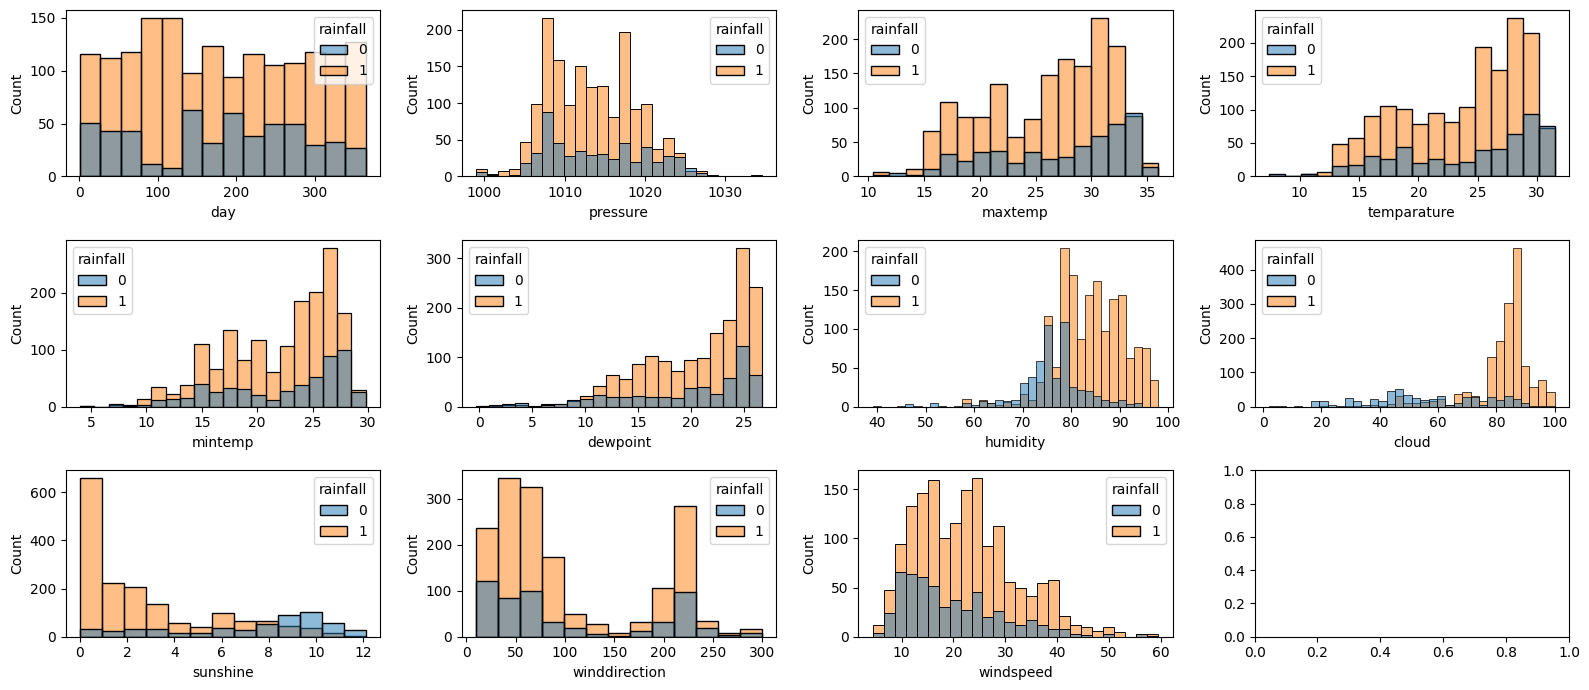

In [125]:
sc.cache_fig(
    'dist_features', lambda x: [sns.histplot(df_train, x=i, ax=ax, hue=target) for i, ax in zip(X, x)] , 3, 4, (16, 7), redraw = False
)